In [1]:
from mts.core.mtserie_dataset import MTSerieDataset
from mts.core.projections import ProjectionAlg
from models.emotion_dataset_controller import *
import matplotlib.pyplot as plt

from mts.core.projections import ProjectionAlg, euclidean_distance_matrix, mds_projection, compute_k_distance_matrixes, compute_distance_matrix

In [2]:
controller = AppController()

In [3]:

dataset_id = 'emotions_in_music'
controller.loadLocalDataset(dataset_id)


True

In [4]:
dataset = controller.datasets[dataset_id]

In [5]:
D_k = compute_k_distance_matrixes(
            dataset.get_mtseries(),
            dataset.temporalVariables,
            DistanceType.EUCLIDEAN
        )


Arousal
Valence


In [6]:
D = compute_distance_matrix(
            D_k, {'Arousal':1,'Valence':1}, dataset.instanceLen)


In [7]:
dataset.compute_projection(
    D,
    projectionAlg = ProjectionAlg.UMAP,
)
coords = np.array([dataset._projections[id]
                          for id in dataset.ids])

/home/texs/anaconda3/envs/peax3/lib/python3.7/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


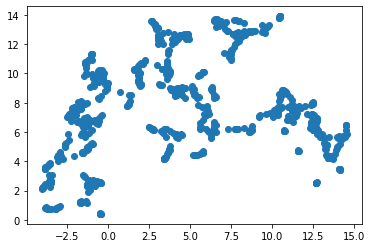

In [8]:
# coords = np.array(list(dataset._projections.values())) 
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
)
